# Finding Heavy Traffic Indicators on I-94

## Table of Content

1. Introduction
2. Imports
3. Loading Data set
4. Data Assessing
5. Data Cleaning
6. Data Analysis
7. Conclusion
8. Future Recommendations

# 1. Introduction

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of day, day of week, etc. For instance, we may find out that traffic is usually heavier in the summer or when it snows.

###### Data Set Information:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.  Also, the **station only records westbound traffic (cars moving from east to west)**.


Attribute Information:

|column name||type||description|
|-----------||-----||---------|
|holiday|| Categorical|| US National holidays plus regional holiday, Minnesota State Fair|
|temp|| Numeric|| Average temp in kelvin
|rain_1h|| Numeric|| Amount in mm of rain that occurred in the hour
|snow_1h|| Numeric|| Amount in mm of snow that occurred in the hour
|clouds_all|| Numeric|| Percentage of cloud cover
|weather_main|| Categorical|| Short textual description of the current weather
|weather_description|| Categorical|| Longer textual description of the current weather
|date_time|| DateTime|| Hour of the data collected in local CST time
|traffic_volume|| Numeric|| Hourly I-94 ATR 301 reported westbound traffic volume

# 2. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Loading Data set

In [3]:
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

# 4. Data Assessing

In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [5]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
i_94['date_time'].unique()

array(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
       '2012-10-02 11:00:00', ..., '2018-09-30 21:00:00',
       '2018-09-30 22:00:00', '2018-09-30 23:00:00'], dtype=object)

The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00. However, the data time column is not a datetime type, so we will convert and add attributes as needed for the analysis.

# 5. Data Cleaning

In [9]:
# converting to datetime type
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

### Day vs Night

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [10]:
#day time data
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

#night time data
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between `day` and `night` is due to a few hours of missing data. For instance, if you look at rows `176` and `177` `(i_94.iloc[176:178])`, you'll notice there's no data for two hours (4 and 5).

In [11]:
i_94.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


### Adding month, year, dayofweek, hour columns

In [110]:
day['month'] = day['date_time'].dt.month
night['month'] = night['date_time'].dt.month

In [91]:
day['year'] = day['date_time'].dt.year
night['year'] = night['date_time'].dt.year

In [92]:
day['dayofweek'] = day['date_time'].dt.dayofweek
night['dayofweek'] = night['date_time'].dt.dayofweek

In [93]:
day['hour'] = day['date_time'].dt.hour
night['hour'] = night['date_time'].dt.hour

# 6. Data Analysis

### Traffic Volume Distribution

Text(0.5, 1.0, 'Traffic Volume Distribution')

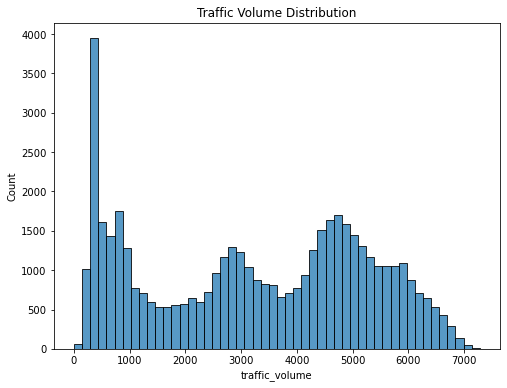

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(data=i_94,x='traffic_volume',bins=50)
plt.title('Traffic Volume Distribution')

In [33]:
#statistics of traffic volume
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 and 2018-09-30, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

### Day and Night Distribution

In [84]:
# day time distribution
day['traffic_volume'].value_counts(bins=10).sort_values(ascending=False)

(4368.0, 5096.0]               7729
(5096.0, 5824.0]               4677
(3640.0, 4368.0]               3803
(5824.0, 6552.0]               3553
(2912.0, 3640.0]               1386
(6552.0, 7280.0]                925
(2184.0, 2912.0]                724
(1456.0, 2184.0]                665
(728.0, 1456.0]                 368
(-7.281000000000001, 728.0]      47
Name: traffic_volume, dtype: int64

In [85]:
# night time distribution
night['traffic_volume'].value_counts(bins=10).sort_values(ascending=False)

(-6.3870000000000005, 638.6]    7153
(638.6, 1277.2]                 4983
(2554.4, 3193.0]                4359
(1915.8, 2554.4]                2350
(1277.2, 1915.8]                1950
(3193.0, 3831.6]                1872
(5108.8, 5747.4]                 821
(5747.4, 6386.0]                 433
(3831.6, 4470.2]                 256
(4470.2, 5108.8]                 150
Name: traffic_volume, dtype: int64

(0.0, 8000.0)

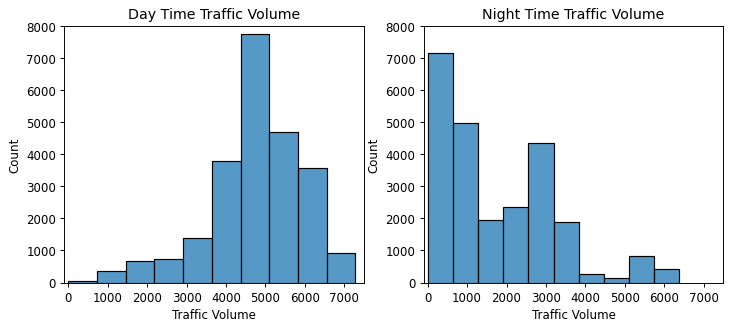

In [87]:
#grid chart
plt.figure(figsize=(10, 4),dpi=85)

# day subplot
plt.subplot(1, 2, 1)
sns.histplot(data=day, x='traffic_volume',bins=10)
plt.title('Day Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim(-100,7500)
plt.ylim(0,8000)

# night subplot
plt.subplot(1, 2, 2)
sns.histplot(data=night, x='traffic_volume',bins=10)
plt.title('Night Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim(-100,7500)
plt.ylim(0,8000)


In [88]:
print('Day Statistics')
print(day['traffic_volume'].describe())
print('\t')
print('Night Statistics')
print(night['traffic_volume'].describe())

Day Statistics
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
	
Night Statistics
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the night time data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. **Our goal is to find indicators of heavy traffic, so we'll only focus on the <u>daytime</u> data moving forward.**

### Time Indicators

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

#### Month

In [112]:
# 1 is January ... 12 is December
by_month = day.groupby('month').mean()

In [113]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0.5, 0, 'Month')

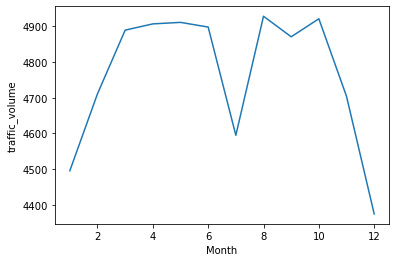

In [120]:
sns.lineplot(data=by_month,y='traffic_volume',x=by_month.index)
plt.xlabel('Month')

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

#### July over the Years

In [127]:
only_july = day[day['month'] == 7]

In [128]:
july_years = only_july.groupby('year').mean()['traffic_volume']

In [130]:
july_years

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Average Traffic Volume')

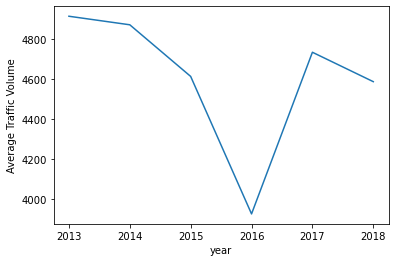

In [135]:
sns.lineplot(data=july_years,x='year',y=july_years.values)
plt.ylabel('Average Traffic Volume')

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

#### Day of Week

Now, we explore the traffic volume averages for each day of the week.

In [139]:
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

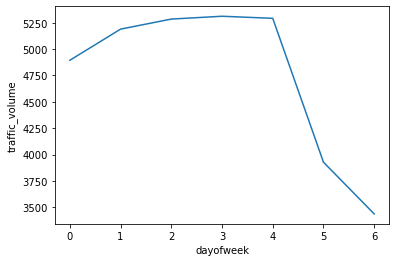

In [140]:
sns.lineplot(data=by_dayofweek,y='traffic_volume',x=by_dayofweek.index)
plt.show()

Note: 0 is Monday, 6 is Sunday.

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

#### Hour

We'll now generate a line plot for the time of day(hour). The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [144]:
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print('Business Day', by_hour_business['traffic_volume'])
print('\n')
print('Weekend',by_hour_weekend['traffic_volume'])

Business Day hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Weekend hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [149]:
by_hour_business

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek
hour,,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,2015.562712,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,2015.493234,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,2015.548924,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,2015.526738,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,2015.528275,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,2015.550000,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,2015.514053,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,2015.501056,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,2015.509719,1.962563


(1000.0, 7000.0)

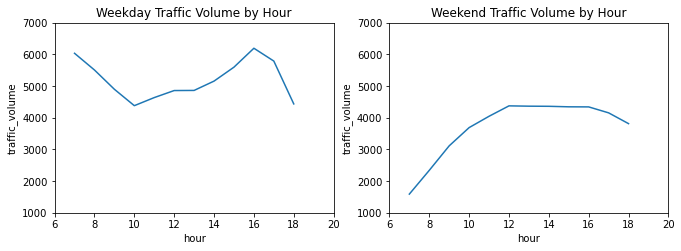

In [157]:
#grid chart
plt.figure(figsize=(11, 3.5))

# weekday subplot
plt.subplot(1, 2, 1)
sns.lineplot(data=by_hour_business,y='traffic_volume',x=by_hour_business.index)
plt.title('Weekday Traffic Volume by Hour')
plt.xlim(6,20)
plt.ylim(1000,7000)

# weekend subplots
plt.subplot(1, 2, 2)
sns.lineplot(data=by_hour_weekend,y='traffic_volume',x=by_hour_weekend.index)
plt.title('Weekend Traffic Volume by Hour')
plt.xlim(6,20)
plt.ylim(1000,7000)

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

### Weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [164]:
day.corr()['traffic_volume'].sort_values()

dayofweek        -0.416453
clouds_all       -0.032932
month            -0.022337
year             -0.003557
snow_1h           0.001265
rain_1h           0.003697
temp              0.128317
hour              0.172704
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

`Temp` shows the strongest positive correlation with a value of +0.128. We have already explored traffic volume's relationship with `hour` and `dayofweek`, and these correlation values affirm our beliefs. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

(230.0, 320.0)

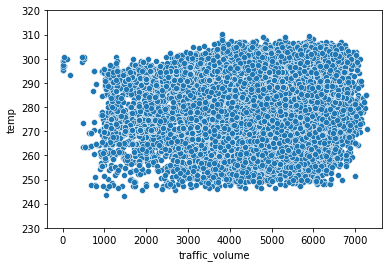

In [169]:
sns.scatterplot(data=day,x='traffic_volume',y='temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis

We can conclude that `temp` doesn't look like a solid indicator of heavy traffic.

### Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [170]:
by_weather_main = day.groupby('weather_main').mean()

In [175]:
weather_main = by_weather_main['traffic_volume'].sort_values()

<AxesSubplot:ylabel='weather_main'>

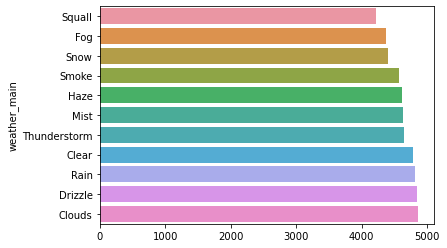

In [204]:
#horizontal bar plot for traffic_volume and weather_main
sns.barplot(y=weather_main.index,x=weather_main.values)

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also analyze `weather_description`, which has a more granular weather classification.

In [205]:
by_weather_description = day.groupby('weather_description').mean()

In [206]:
weather_desc = by_weather_description['traffic_volume'].sort_values()

<AxesSubplot:ylabel='weather_description'>

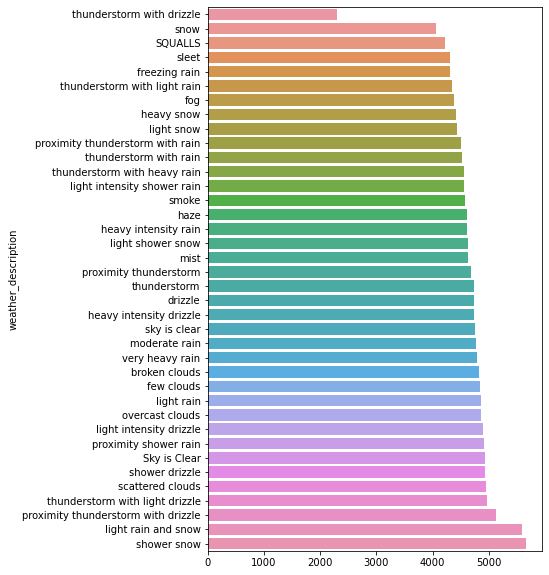

In [209]:
#horizontal bar plot for traffic_volume and weather_main
plt.figure(figsize=(6,10))
sns.barplot(y=weather_desc.index,x=weather_desc.values)

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# 7. Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
    * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    * The traffic is usually heavier on business days compared to the weekends.
    * On business days, the rush hours are around 7 and 16.
* Weather indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle

# 8. Future Recommendations

Next steps include the following:

* Use the nighttime data to look for heavy traffic indicators.
* Find more time and weather indicators.
* Add an attribute that notes whether or not construction occured.